# Root Finders and Minimizers in Python
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), July 2019

The code in this Jupyter notebook was written using Python 3.7. It also uses data file `Econ381totpts.txt`. For the code to run properly, you will need every code cell in this notebook that references the data file to have the correct directory path listed.

## 1. General characterization of maximization/minimization problem
Root finders and minimizers are the two key tools for solving numerical optimization problems. We will define the general formulation of an optimization problem as a minimization problem in the following way,

$$ \min_{x}\: f\left(x,z|\theta\right) \quad\text{s.t}\quad g(x,z|\theta)\geq 0 \quad\text{and}\quad h(x) = 0 $$

where $f$ is a system of potentially nonlinear equations that are a function of the vectors of (potentially dynamic)  variables $x$ and $z$ and parameter vector $\theta$, subject to the vector of inequality constraints $g$ and the vector of equality constraints $h$.

A computational algorithm that searches for the value of $x$ that minimizes the problem above is called a **minimizer**. Sometimes the solution to the minimization problem above can be written as a system of equations in $x$.

$$ \hat{x} = x: \quad \phi(x|z,\theta) = 0 $$

The maximization problem can be reduced to this system of characterizing equations when the inequality constraints can be shown to never bind (interior solution). A computational algorithm that searches for the value $\hat{x}$ that sets the value of each equation in the system $\phi(x|z)$ to 0 is called a **root finder**. 

## 2. Root Finders
Suppose the solution to a system of $N$ nonlinear equations $\phi(x|z,\theta)=0$ is the $N\times 1$ vector $\hat{x}$. 


### 2.1. Univariate root finders
Suppose that $x$ is a scalar such that the system of equations is one equation $\phi(x|\theta)=0$ and one unknown $x$. Let's assume the simple cubic polynomial functional form.

$$\phi(x|\theta)= x^3 + x + \theta $$

The roots of this function are all the values of $x$ such that $\phi(x|\theta)=0$, or rather $x^3 + x + \theta$. We first define a Python function `cubic_pol()` that takes as inputs a value for $x$ and a value for $\theta$ and returns the value of the function.

In [1]:
def phi_pol(xvals, theta):
    '''
    --------------------------------------------------------------------
    This function returns the value phi(x,theta) given x and theta,
    where phi(x,theta) = (x ** 3) + x + theta
    --------------------------------------------------------------------
    INPUTS:
    xvals = scalar or (N,) vector, value or values for x
    args  = length 1 tuple, (theta)
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    theta = scalar, constant in the phi function
    phi   = scalar or (N,) vector, value of phi(xvals, theta)
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: phi
    --------------------------------------------------------------------
    '''
    phi = (xvals ** 3) + xvals + theta
    
    return phi

We can explore this function $\phi(x|\theta)$ graphically by plotting it for a given value of $\theta$ and for many values of $x$. The following plot is for $N=100$ values of $x$ between -10 and 10 and for $\theta=10$.

<IPython.core.display.Javascript object>


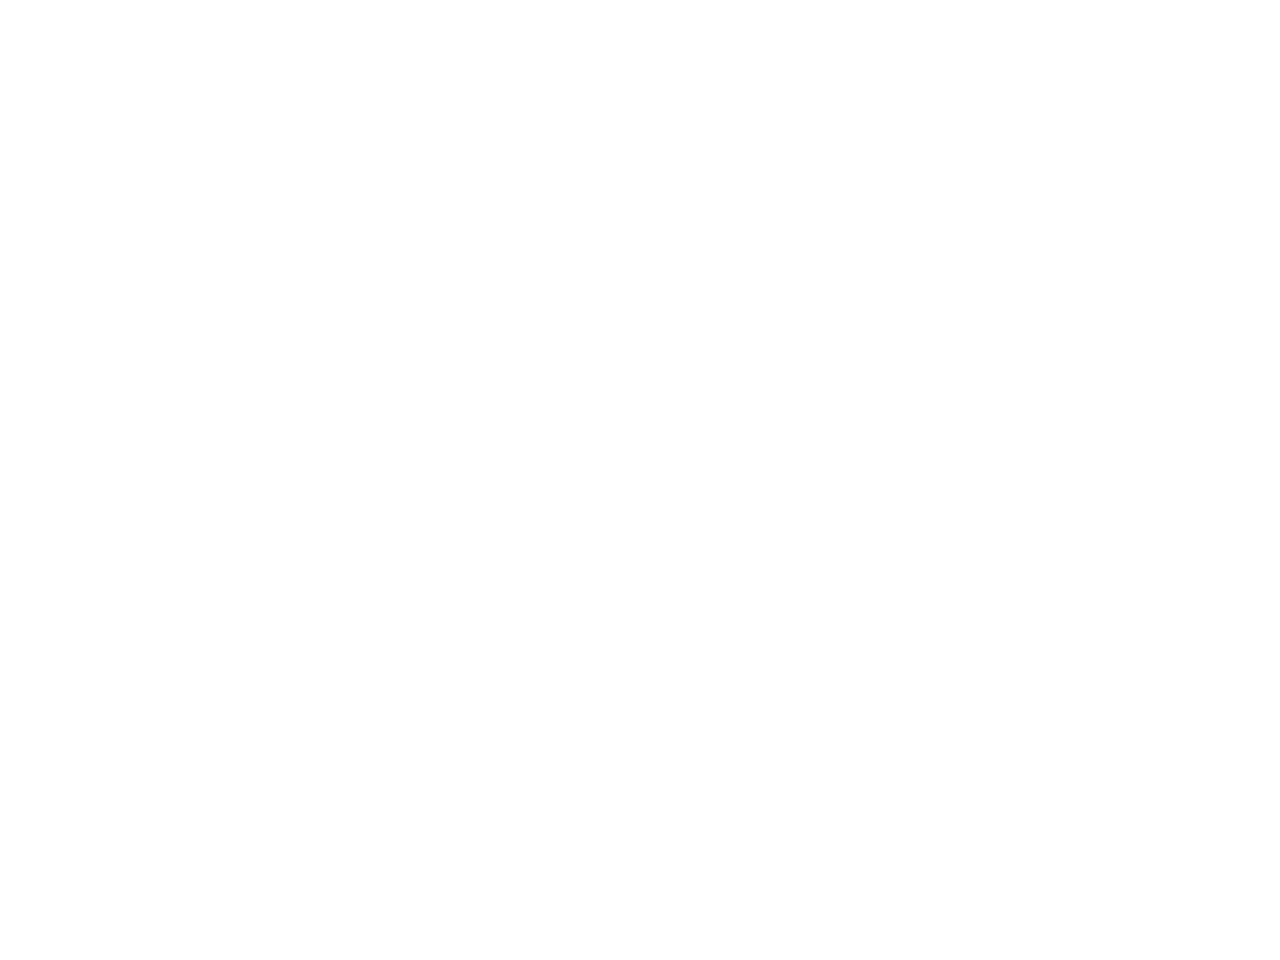

Text(0,0.5,'$\\phi(x|\\theta=10)$')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

theta = 10
xmin = -10
xmax = 10
N = 100
xvals = np.linspace(xmin, xmax, N)
phi_vals = phi_pol(xvals, theta)

# Plot the resulting phi values
fig, ax = plt.subplots()
plt.plot(xvals, phi_vals)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Phi function for theta=10 and x=[-10,10]', fontsize=20)
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x|\theta=10)$')

From the plot above, it looks like the function $\phi(x|\theta=10)$ has one root somewhere in the neighborhood of $x\approx -2$. Plugging `x=2` into the function reveals that it is identically the root. So we know what the answer should be. Let's see how close the root finding algorithms get.

Python's `Scipy` library has a sub-library called `scipy.optimize`. The `scipy.optimize` sub-library has all of Python's most standard univariate and multivariate root finder algorithms as well as Python's most standard minimizer algorithms. Scrolling a little more than halfway down the main [`scipy.optimize` reference page](https://docs.scipy.org/doc/scipy/reference/optimize.html), we find the links to the documentation for the 5 univariate root finder algorithms in `scipy.optimize`. These are:

* [`brentq()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq)
* [`brenth()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brenth.html#scipy.optimize.brenth)
* [`ridder()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.ridder.html#scipy.optimize.ridder)
* [`bisect()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect)
* [`newton()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)

The first four univariate root finders require a known bracketing interval for the root. That is, the user must know that $\hat{x}\in[a, b]$. For the `newton()` method, the bracketing interval is not required. We will solve for this root with the `bisect()` method and with the `newton()` method.

In [3]:
import scipy.optimize as opt

a =-5
b = 0

(xhat, result) = opt.bisect(phi_pol, a, b, args=(theta,), full_output=True)

print('xhat: ', xhat)
print(result)

xhat:  -1.9999999999993179
      converged: True
           flag: 'converged'
 function_calls: 44
     iterations: 42
           root: -1.9999999999993179


As we saw in the Figure of the $\phi(x|\theta=10)$ function, the root for this function is very close to $\hat{x}\approx 2$.

Note that the first argument of the `scipy.optimize.bisect()` function is the function `phi_pol()`. This function's first input must be the scalar being chosen ($x$ in this case), and it must return a scalar representing the function evaluated at a particular $x$. It is the return scalar of the function `phi_pol()` that the `bisect()` algorithm is trying to set to zero. The next two arguments $a$ and $b$ are the bounds within which the `bisect()` algorithm is searching for the root. One requirement of the `bisect()` algorithm is that the target function must return values with different signs when evaluated at $a$ and $b$. The `args=()` argument passes a tuple of extra arguments to the `phi_pol()` function. In this case, we want to pass the `theta` parameter.

One caveat with the bisection method is that it will only find one root in the bracketing interval $[a,b]$. If the function has two roots in the interval, the `bisect()` method will only find one of them. This is true of all five univariate root finder methods as well as all minimizers and multivariate root finders in `scipy.optimize`. They will only return one root of minimum. Whether that root is unique or whether the minimum is a global min rather than a local min depends on how well the researcher understands the function.

The `newton()` method uses a standard Newton-Raphson hill climbing (gradient descent) method to find the root of the function. Rather than needing to know the bracketing interval where the root exists, you must supply the function with an initial guess.

In [4]:
x_init = 10.0

xhat = opt.newton(phi_pol, x_init, args=(theta,))
print(xhat)

-1.9999999999999996


One thing to note here is that the precision of the tolerance matters. That is, I can get a slightly different answer if I start the search from `x_init=-10`. In fact, when I start below the actual value I get the analytical solution $\hat{x}=-2.0$. However, the difference between the two answers is extremely small.

### 2.2. Multivariate root finders
For our example of multivariate root finders, let's use the two characterizing equations for optimal lifetime savings from the 3-period-lived agent overlapping generations model with exogenous labor supply. In this case, the solution $x$ will be a $(2\times 1)$ vector of savings for middle age $b_2$ and old age $b_3$ given interest rates ($r_2, r_3$) and wages ($w_1, w_2, w_3$) over the lifetime and utility function parameters ($\beta, \sigma$).

$$ \phi(b_2, b_3|r_2, r_3, w_1, w_2, w_3, \beta, \sigma) = 0 $$

$$ \Rightarrow \qquad\:\:\:\, (w_1 - b_2)^{-\sigma} - \beta(1 + r_2)([1 + r_2]b_2 + w_2 - b_3)^{-\sigma} = 0 $$
$$ \Rightarrow ([1 + r_2]b_2 + w_2 - b_3)^{-\sigma} - \beta(1 + r_3)([1 + r_3]b_3 + w_3)^{-\sigma} = 0 $$

This is two equations and two unknowns ($b_2, b_3$). Everything other than the two savings levels is known in the two equations. Further, Inada conditions bound the solution for consumption strictly away from $c_t\leq 0$, which means that the two equation system should be solvable using an unconstrained root finder for ($b_2, b_3$).

We first write some functions that compute the Euler errors shown above given the values for lifetime savings ($b_2, b_3$), interest rates ($r_2, r_3$), wages ($w_1, w_2, w_3$), and utility function parameters ($\beta, \sigma$).

In [5]:
def get_ct(bt, btp1, rt, wt):
    '''
    --------------------------------------------------------------------
    This function returns the value of current period consumption given
    b_t, b_{t+1}, r_t, and w_t.
    --------------------------------------------------------------------
    INPUTS:
    bt   = scalar, current period savings
    btp1 = scalar, savings for next period
    rt   = scalar > 0, current period interest rate
    wt   = scalar > 0, current period wage
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    ct = scalar, current period consumption
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: ct
    --------------------------------------------------------------------
    '''
    ct = (1 + rt) * bt + wt - btp1
    
    return ct


def MU_stitch(ct, sigma):
    '''
    --------------------------------------------------------------------
    Generate marginal utility of consumption with CRRA consumption
    utility and stitched function at lower bound such that the new
    hybrid function is defined over all consumption on the real
    line but the function has similar properties to the Inada condition.

    u'(c) = c ** (-sigma) if c >= epsilon
          = g'(c) = 2 * b2 * c + b1 if c < epsilon

        such that g'(epsilon) = u'(epsilon)
        and g''(epsilon) = u''(epsilon)

        u(c) = (c ** (1 - sigma) - 1) / (1 - sigma)
        g(c) = b2 * (c ** 2) + b1 * c + b0
    --------------------------------------------------------------------
    INPUTS:
    ct    = scalar, current consumption
    sigma = scalar >= 1, coefficient of relative risk aversion for CRRA
            utility function: (c**(1-sigma) - 1) / (1 - sigma)

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    epsilon  = scalar > 0, positive value close to zero
    c_cnstr  = boolean, =True if ct < epsilon
    b1       = scalar, intercept value in linear marginal utility
    b2       = scalar, slope coefficient in linear marginal utility
    MU_c     = scalar, marginal utility of consumption
    
    FILES CREATED BY THIS FUNCTION: None

    RETURNS: MU_c
    --------------------------------------------------------------------
    '''
    epsilon = 0.0001
    c_cnstr = ct < epsilon
    if c_cnstr:
        b2 = (-sigma * (epsilon ** (-sigma - 1))) / 2
        b1 = (epsilon ** (-sigma)) - 2 * b2 * epsilon
        MU_c = 2 * b2 * ct + b1
    else:
        MU_c = ct ** (-sigma)
    
    return MU_c


def get_EulErrs(bvec, *args):
    '''
    --------------------------------------------------------------------
    INPUTS:
    bvec = (2,) vector, values for lifetime savings (b2, b3)
    args = length 7 tuple, (r2, r3, w1, w2, w3, beta, sigma)
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        get_ct()
        MU_stitch()
    
    OBJECTS CREATED WITHIN FUNCTION:
    r2    = scalar > 0, interest rate in period 2
    r3    = scalar > 0, interest rate in period 3
    w1    = scalar > 0, wage in period 1
    w2    = scalar > 0, wage in period 2
    w3    = scalar > 0, wage in period 3
    beta  = scalar in (0, 1), discount factor
    sigma = scalar >= 1, coefficient of relative risk aversion
    c1    = scalar, consumption in period 1
    c2    = scalar, consumption in period 2
    c3    = scalar, consumption in period 3
    MU_c1 = scalar > 0, marginal utility of consumption in period 1
    MU_c2 = scalar > 0, marginal utility of consumption in period 2
    MU_c3 = scalar > 0, marginal utility of consumption in period 3
    err1  = scalar, Euler error for savings decision b2
    err2  = scalar, Euler error for savings decision b3
    err_vec = (2,) vector, Euler errors from two Euler equations
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    b2, b3 = bvec
    r2, r3, w1, w2, w3, beta, sigma = args
    c1 = get_ct(0.0, b2, 0.0, w1)
    c2 = get_ct(b2, b3, r2, w2)
    c3 = get_ct(b3, 0.0, r3, w3)
    MU_c1 = MU_stitch(c1, sigma)
    MU_c2 = MU_stitch(c2, sigma)
    MU_c3 = MU_stitch(c3, sigma)
    err1 = MU_c1 - beta * (1 + r2) * MU_c2
    err2 = MU_c2 - beta * (1 + r3) * MU_c3
    err_vec = np.array([err1, err2])
    
    return err_vec

We can now run a multivariate root finder to try and find the solution to this problem. The function [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root) contains all of the multivariate root finders in `SciPy`. Within `scipy.optimize.root()`, you can choose among 10 different methods of multivariate root finders.

In [6]:
# Declare parameter values and exogenous variable values
beta = 0.96 ** (80 / 3)
sigma = 2.1
r2 = 0.6
r3 = 0.7
w1 = 0.5
w2 = 0.5
w3 = 0.5

# Make initial guess for solution of savings values. Note that these
# two guesses must be feasible and not violate c_t > 0 for all t
b2_init = 0.05
b3_init = 0.10
b_init = np.array([b2_init, b3_init])
b_args = (r2, r3, w1, w2, w3, beta, sigma)
b_result = opt.root(get_EulErrs, b_init, args=(b_args))
print(b_result)
print('Roots: ', b_result.x)

    fjac: array([[-0.62131583,  0.78356024],
       [-0.78356024, -0.62131583]])
     fun: array([-3.15303339e-14,  1.33226763e-14])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([5.84663084e-10, 2.71131036e-10])
       r: array([-53.69058364,  75.61460354, -40.9982635 ])
  status: 1
 success: True
       x: array([-0.09464793, -0.09436425])
Roots:  [-0.09464793 -0.09436425]


The output from the multivariate minimizer above is stored as a Python dictionary named `b_result`. The elements of the dictionary include:

* `fun`: the value of the error functions at the solution
* `message`: a message about whether the solution converged
* `nfev`: number of function evaluations until convergence
* `success`: boolean that you want to equal `True`
* `x`: the vector of roots of the function

## 3. Minimizers
In the `scipy.optimize` library is the [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.minimize.html) function, which contains all of `SciPy`'s main unconstrained and constrained minimizer functions. A minimizer is an algorithm that tries to find the $x$ that minimizes the following problem,

$$ \min_{x}\: f\left(x,z|\theta\right) \quad\text{s.t}\quad g(x,z|\theta)\geq 0 \quad\text{and}\quad h(x) = 0 $$

where $f$ is a system of potentially nonlinear equations that are a function of the vectors of (potentially dynamic)  variables $x$ and $z$ and parameter vector $\theta$, subject to the vector of inequality constraints $g$ and the vector of equality constraints $h$.

### 3.1. Unconstrained minimizers
An unconstrained minimizer is an algorithm in which no inequality constraints $g$ and no equality constraints $h$ are present.

$$ \min_{x}\: f\left(x,z|\theta\right) $$

Each of the 12 methods available in the [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.minimize.html) function can be used as an unconstrained minimizer.

To present an example of using a minimizer, we will perform a standard maximum likelihood estimation. Import some data from the total points earned by all the students in two sections of my intermediate macroeconomics class for undergraduates at my previous University in a certain year (two semesters). The maximum possible points in both semesters was 450.

In [7]:
pts = np.loadtxt('DataFiles/Econ381totpts.txt')
# pts

Let's create a histogram of the test score data to see what it looks like.

(0, 550)

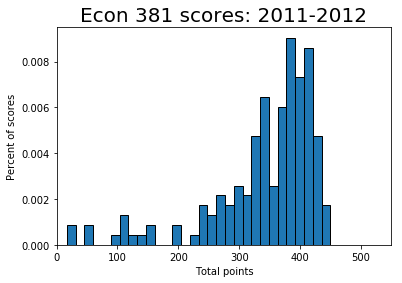

In [8]:
count, bins, ignored = plt.hist(pts, 30, density=True, edgecolor='black')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted

Despite the fact that this distribution is truncated in the upper tail at `pnts=450` and would be better modeled by a truncated distribution like a truncated normal, we will fit a normal distribution $N(\mu,\sigma)$ to this data for simplicity of exposition.

The estimation process is a basic minimization problem as stated elsewhere in this notebook. The maximum likelihood estimation problem is to choose the vector of parameters $(\mu,\sigma)$ that maximizes the likelihood of seeing the data in `Econ381totpts.txt`, given the assumption that the data came from a normal distribution $N(\mu,\sigma)$. Let the probability density function of the normal distribution be represented by $f(x|\mu,\sigma)$. This `pdf` gives the probability density of an observation of data $x$ given values for the distribution parameters ($\mu,\sigma$). Then the following is the statement of the maximum likelihood estimation as a maximization problem,

$$ \max_{\mu,\sigma}\: \ln\bigl(\mathcal{L}\bigr) = \sum_{n=1}^N\ln\Bigl(f(pnts_n|\mu,\sigma)\Bigr) $$

where $\ln(\mathcal{L})$ is the log likelihood function.

To solve this computationally, it must be restated as a minimization problem. This is as simple as minimizing the negative of the log likelihood function.

$$ \min_{\mu,\sigma}\: -\ln\bigl(\mathcal{L}\bigr) = -\sum_{n=1}^N\ln\Bigl(f(pnts_n|\mu,\sigma)\Bigr) $$

In [9]:
import scipy.stats as sts

def log_lik_norm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        sts.norm.pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = sts.norm.pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

#### 3.1.1. The criterion function
Now that we have written a function `log_lik_norm()` that gives us the value of the log likelihood function $\ln(\mathcal{L})$ for a given set of data $\{pnts_n\}_{n=1}^N$ and for given parameter values $\mu$ and $\sigma$, we must define a criterion function that will be the object of our minimization algorithm.

The first step in writing a criterion function is to define a function that takes two inputs and returns a scalar value.
1. The first input is either a scalar or a vector of values (the object `params` in the function `crit()` below). This object is the value or values being chosen to minimize the criterion function.
2. The second object is Python's variable length input objects `*args`, which is a tuple of variable length positional arguments. As you will see in the `minimize()` function, all the arguments must be passed into the criterion function in one tuple.
3. Lastly, you must make sure that the scalar criterion value that the function returns is the value of the problem stated as a minimization problem and not a maximization problem. In this case of maximum likelihood estimation, you want the negative of the log likelihood function.

In [10]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    args   = length 1 tuple, (xvals,)
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mu              = scalar, mean of the normally distributed random
                      variable
    sigma           = scalar > 0, standard deviation of the normally
                      distributed random variable
    xvals           = (N,) vector, values of the normally distributed
                      random variable
    log_lik_val     = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

#### 3.1.2. The minimize() function
The `minimize()` function is shorthand for `scipy.optimize.minimize()`. This function returns a dictionary of objects including the solution to the optimization problem and whether the problem actually solved. The `minimize` function has three mandatory arguments, plus a lot of options. You can experiment with the options on the [`minimize()` documentation page](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).
1. The first argument of the minimize function is the criterion function (`crit()` in this example) from which the `minimize()` function will test values of the parameters in searching for the minimum value.
2. The second argument is an initial guess for the values of the parameters that minimize the criterion function `crit()`.
3. The third argument is the tuple of all the objects needed to solve the criterion function in `crit()`.

In [11]:
mu_init = 400
sig_init = 70
params_init = np.array([mu_init, sig_init])
mle_args = (pts,)
norm_results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = norm_results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 341.9089595160804  sig_MLE= 88.47607577463583


In [12]:
norm_results_uncstr

      fun: 950.1687934485401
 hess_inv: array([[ 78.40792272, -28.37053145],
       [-28.37053145,  26.81263732]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 17
     njev: 20
   status: 0
  success: True
        x: array([341.90895952,  88.47607577])

Let's see how this estimated distribution with $\hat{\mu}$ and $\hat{\sigma}$ fits the data.

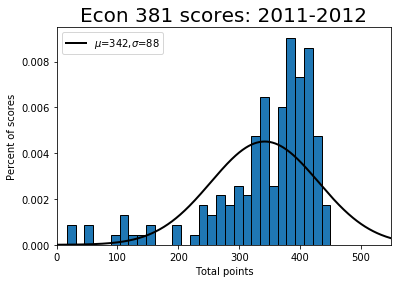

In [13]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(pts, 30, density=True, edgecolor='black')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted

# Plot the MLE estimated distribution
dist_pts = np.linspace(0, 550, 500)
plt.plot(dist_pts, sts.norm.pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='k', label='$\mu$=342,$\sigma$=88')
plt.legend(loc='upper left')

As was mentioned before, this distribution does not have an ideal fit because we assumed a normal distribution (non-truncated), whereas the data clearly had an upper bound at 450. However, this section demonstrates how to successfully execute a minimizer using the `scipy.optimize.minimize()` function.

### 3.2. Constrained minimizers
The `minimize()` function has many methods that can be used to find the parameter values that minimize some criterion function. These methods are called using the `method='MethodName'` optional input argument to the minimize function. Three of those methods allow for constrained minimization by providing upper and lower bounds for the parameters being chosen. These three methods are `'L-BFGS-B'`, `'TNC'`, and `'SLSQP'`.

Suppose you were trying to estimate $\mu$ and $\sigma$ of a normal distribution as is the case in our test scores example. The value of $\mu$ need not be constrained. However, the value of $\sigma$ must be strictly positive. You could include these bounds in a constrained minimization by using the following code.

In [14]:
norm_results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                                 bounds=((None, None), (1e-10, None)))
mu_MLE_cstr, sig_MLE_cstr = norm_results_cstr.x
print('mu_MLE=', mu_MLE_cstr, ' sig_MLE=', sig_MLE_cstr)

mu_MLE= 341.90834708017104  sig_MLE= 88.47558469683685


In [15]:
norm_results_cstr

      fun: 950.1687934518998
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -1.13686838e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 9
   status: 0
  success: True
        x: array([341.90834708,  88.4755847 ])

Note that you must set the lower bound of $\sigma$ equal to some small positive number close to zero. You cannot set it to zero itself because the bounds are inclusive. That is, the minimizer might try a value of $\sigma=0$ is the lower bound includes zero.

## 4. Final Notes
The little advertised truth is that no root finder is guaranteed to find the right roots or any roots, and no minimizer is guaranteed to find the global minimum for any set of characterizing equations. More accurately, it is a rare and special case to find characterizing functions for which standard root finders and minimizers solve robustly. Press, et al (2007, pp. 442-443) highlight that with nonlinear multidimensional root finding problems,

> "...you can never be sure that the root is there at all until you have found it.... It cannot be overemphasized, however, how crucially success depends on having a good first guess for the solution,...."

Press, et al (2007, p. 473) also state,

> "We make an extreme, but wholly defensible statement: There are no good, general methods for solving systems of more than one nonlinear equation. Furthermore, it is not hard to see why (very likely) there never will be any good, general methods."

Because initial values are so important to root finders and minimization problems, Judd (1998, p. 172) suggests running a minimization problem with a loose stopping rule on the vector of squared errors. Then one can use that solution as the initial guess for the root finder.

Because root finding and minimization is so difficult, we take great care to report the errors and optimization output in our code. One must show not only that the minimizer or root finder stopped iterating, but also that the errors in the characterizing equations are arbitrarily small. One can also perform robustness tests using varying initial values to provide evidence that the solution is unique in the neighborhood of the solution.

## References
* Judd, Kenneth L., *Numerical Methods in Economics*, MIT Press (1998).
* Press, William H., Saul A. Teukolsky, William T. Vetterling, and Brian P. Flannery, *Numerical Recipes: The Art of Scientific Computing*, 3rd edition, Cambridge University Press (2007).